<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/IRI_defects_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка библиотек**

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.9 MB/s 
     |████████████████████████████████| 189 kB 43.2 MB/s 
     |████████████████████████████████| 1.2 MB 39.8 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 51 kB 269 kB/s 
Mounted at /content/gdrive


**Импорт библиотек**

In [8]:
from fastai.vision.all import *

**Загрузка данных**

In [9]:
path =  Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training')

In [10]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm'),Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Bad')]

Скачивание файлов изображений.

In [11]:
files = get_image_files(path)

In [12]:
len(files)

214

In [13]:
files[0],files[2]

(Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm/img_thermal_1637761638400.jpg'),
 Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Norm/img_thermal_1637761920622.jpg'))

**Создание датасета**

Используется DataBlock и DataLoader, которые считывает разметку данных с названия папки с помощью функции parent_label.



In [15]:
IRI_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [16]:
dls = IRI_data.dataloaders(path)

Просмотр примера изображений

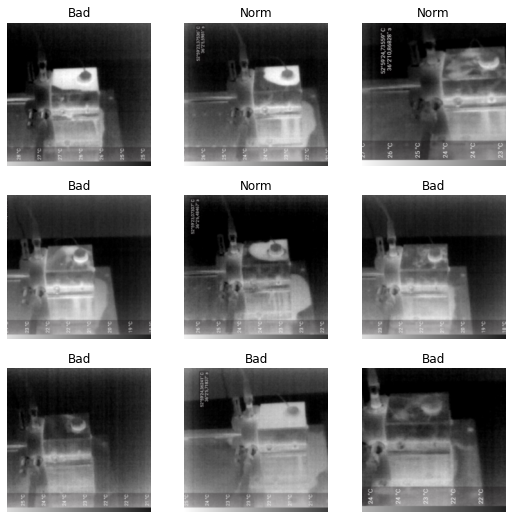

In [17]:
dls.show_batch()

**Обучение**

In [18]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.380341,1.144264,0.547619,01:14


epoch,train_loss,valid_loss,error_rate,time
0,1.141516,0.945245,0.500000,01:15
1,1.034591,0.819448,0.428571,01:14
2,0.961610,0.860811,0.404762,01:14
3,0.868701,0.909295,0.404762,01:15
4,0.851020,0.964099,0.476190,01:14


**Результаты**

Предсказание для любого конкретного изображения

In [19]:
learn.predict(files[101]),files[101]

(('Bad', TensorBase(0), TensorBase([0.9657, 0.0343])),
 Path('/content/gdrive/MyDrive/work/Tribology/IRI_dataset/Training/Bad/img_thermal_1637833041811.jpg'))

Визуализация предсказаний.

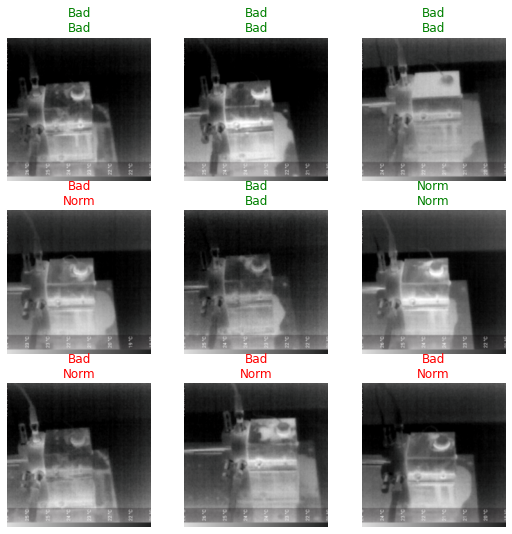

In [20]:
learn.show_results()